## Solution sketch lab 8

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spt

import statsmodels as sms
import statsmodels.formula.api as smf
import seaborn as sns

#For configuring plotting 

from cycler import cycler

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["axes.labelsize"]= 12
plt.rcParams["figure.facecolor"] = "#f2f2f2"
#plt.rcParams['figure.savefig.dpi'] = 100
plt.rcParams['savefig.edgecolor'] = "#f2f2f2"
plt.rcParams['savefig.facecolor'] ="#f2f2f2"
plt.rcParams["figure.figsize"] = [16,10]
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['font.size'] = 14
greens = ['#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
multi =['#66c2a4','#1f78b4','#a6cee3','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
plt.rcParams["axes.prop_cycle"] = cycler(color=multi)




## 1.) leasing

In the PV data set consider the variable "lease", which is a binary variable that indicates whether a system is owned by the host (homeowner, business owner, etc) or whether the panel is leased. Take a subset of the data for the year 2012 and estimate the relationship between cost per kw and the size of the panel in kilowatts (kw)--*nameplate*.

a.) 

- Estimate the regression of cost per kw on the lease indicator and size of the panels (nameplate). 

- Plot the results of the regression overlayed the data. Interpret the results. 

b.) Include an interaction effect in the regression, plot the new results. Does there appear to be an interaction. 

c.) Now consider the variable *contractor_year_total*, which indicates how many installations the contractor of that sytem had installed in that year. We might postulate that there are economies of scale at the contractor scale, so that a contractor who has installed many panels will be able to provide a cheaper price. 

- Estimate a regression with the *contractor_year_total* variable
- Interpret the results.
- Plot the results. With these results, discuss the statistical and practical significance of these results. 

In [12]:
pv = pd.read_csv("data/pv_csi_new.csv", index_col=0)
pv["date"] = pd.to_datetime(pv.date, format="%Y-%m-%d")
pv2012 = pv.loc[(pv.date>=pd.to_datetime("2012-01-01")) & (pv.date<pd.to_datetime("2013-01-01")),:]

In [29]:
mod_as1 = smf.ols("cost_per_kw~lease + nameplate", data=pv2012).fit()
mod_as1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            cost_per_kw   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     100.5
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           3.77e-44
Time:                        11:21:53   Log-Likelihood:            -1.8813e+05
No. Observations:               21622   AIC:                         3.763e+05
Df Residuals:                   21619   BIC:                         3.763e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6045.6141     18.522    326.406      0.000    6009.310    6081.918
lease       -248.2832     21.550    -11.521      0.000    -290.522    -206.044
nameplate     -5.9761      0.729     -8.200      0.000      -7.405      -4.548
==============================================================================
Omnibus:                     6579.280   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32717.578
Skew:                           1.391   Prob(JB):                         0.00
Kurtosis:                       8.346   Cond. No.                         40.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
pv2012.cost_per_kw.describe()


count    21622.000000
mean      5836.202910
std       1460.375434
min       1050.000000
25%       4975.000000
50%       5370.000000
75%       6520.000000
max      25611.111111
Name: cost_per_kw, dtype: float64

In [15]:
pv2012.nameplate.describe()

count    21622.000000
mean         6.008065
std         13.565294
min          0.920000
25%          3.525000
50%          4.995000
75%          6.660000
max       1182.070000
Name: nameplate, dtype: float64

In [16]:
N=2000
x_line = np.linspace(.9 , 1200, N)
y_line = mod_as1.params[0] + mod_as1.params[2]*x_line
y_line_lease = mod_as1.params[0] + mod_as1.params[2]*x_line + mod_as1.params[1]

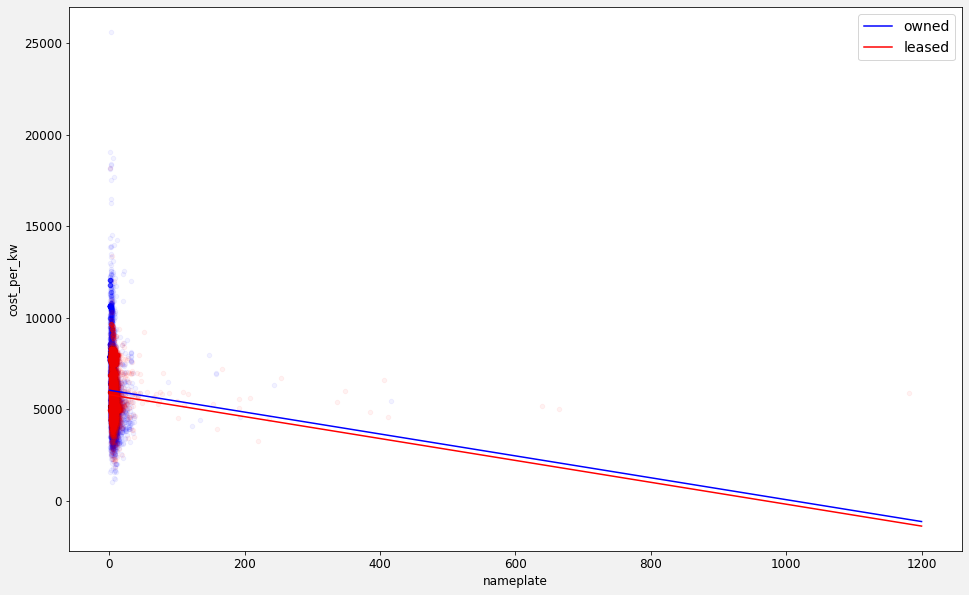

In [17]:

fig, ax = plt.subplots()
pv2012.loc[pv.lease==0].plot.scatter("nameplate", "cost_per_kw", alpha=.05, color="blue", ax=ax)
pv2012.loc[pv.lease==1].plot.scatter("nameplate", "cost_per_kw", alpha=.05, color="red", ax=ax)
#ax.set_ylim(0,20000)
ax.plot(x_line, y_line, color="blue", label="owned")
ax.plot(x_line, y_line_lease, color="red", label="leased")
ax.legend()

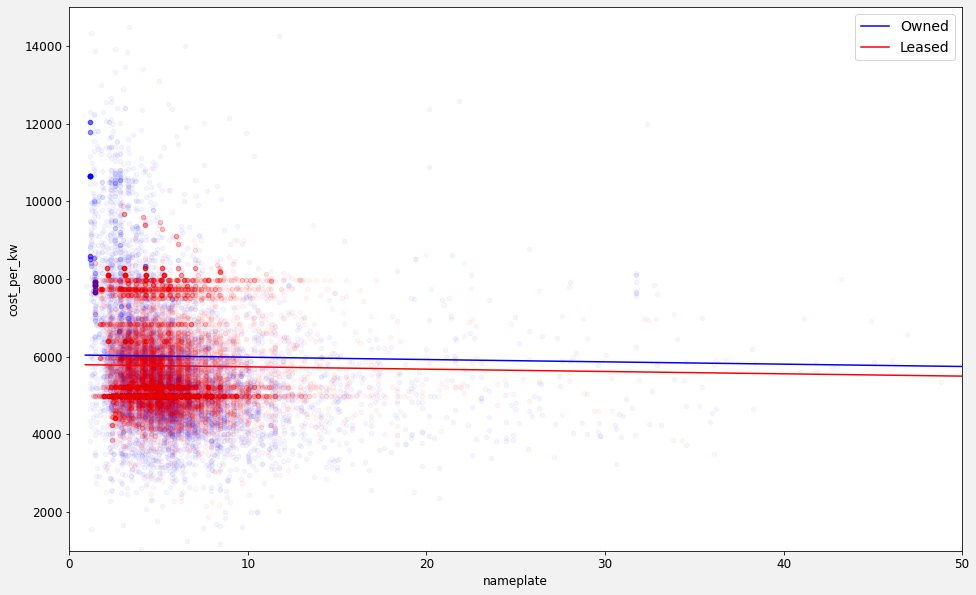

In [18]:

fig, ax = plt.subplots()
pv2012.loc[pv.lease==0].plot.scatter("nameplate", "cost_per_kw", alpha=.04, color="blue", ax=ax)
pv2012.loc[pv.lease==1].plot.scatter("nameplate", "cost_per_kw", alpha=.04, color="red", ax=ax)
ax.set_ylim(1000,15000)
ax.set_xlim(0, 50)
ax.plot(x_line, y_line, color="blue", label="Owned")
ax.plot(x_line, y_line_lease, color="red", label="Leased")
ax.legend()

From this regression we see that leased panels tend to be on average cheaper than host-owned panels. We also see a slight downward slope for nameplate capacity, which indicates some economies of scale at the system-level: larger systems give a cheaper cost per kw, which probably is rather intuitive. 

From looking just at the plotted data, we should notice a couple of things: 

- There seems to be a good deal more variance in the host-owned systems. 

- We also notice the structure in the leased costs with "streaks" in the plotted data

### With interaction

In [19]:
mod_as2 = smf.ols("cost_per_kw~lease*nameplate", data=pv2012).fit()
mod_as2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            cost_per_kw   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     147.1
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           2.27e-94
Time:                        10:23:10   Log-Likelihood:            -1.8801e+05
No. Observations:               21622   AIC:                         3.760e+05
Df Residuals:                   21618   BIC:                         3.761e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        6223.6130     21.733    286.361      0.000    6181.014    6266.212
lease            -451.4180     25.151    -17.948      0.000    -500.716    -402.120
nameplate         -36.1058      2.082    -17.339      0.000     -40.187     -32.024
lease:nameplate    34.2836      2.221     15.434      0.000      29.930      38.638
==============================================================================
Omnibus:                     6853.958   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37110.229
Skew:                           1.426   Prob(JB):                         0.00
Kurtosis:                       8.749   Cond. No.                         64.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
N=2000
x_line2 = np.linspace(.9 , 1200, N)
y_line2 = mod_as2.params[0] + mod_as2.params[2]*x_line
y_line_lease2 = mod_as1.params[0] + mod_as2.params[1] + (mod_as2.params[2]+mod_as2.params[3])*x_line

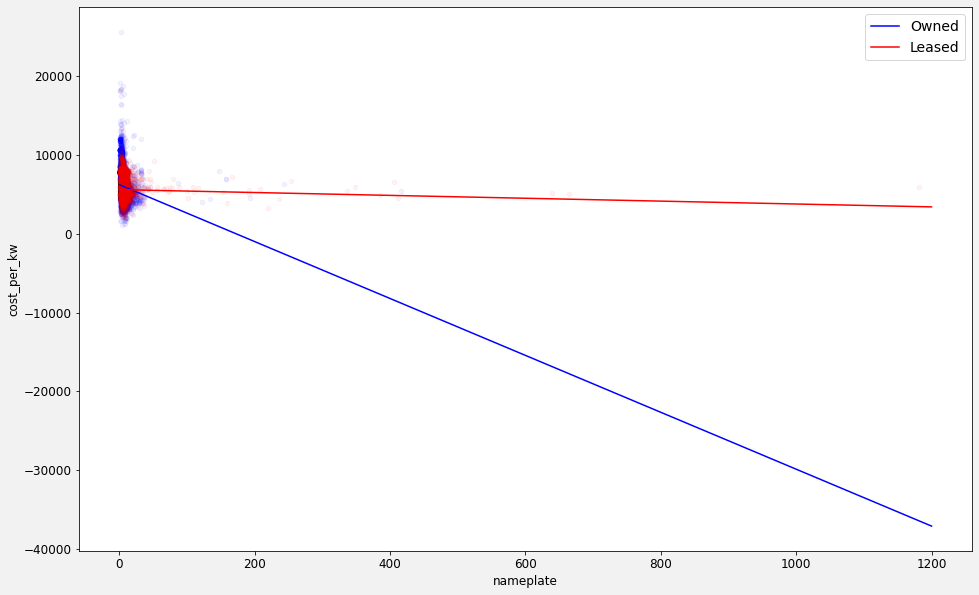

In [21]:
fig, ax = plt.subplots()
pv2012.loc[pv.lease==0].plot.scatter("nameplate", "cost_per_kw", alpha=.05, color="blue", ax=ax)
pv2012.loc[pv.lease==1].plot.scatter("nameplate", "cost_per_kw", alpha=.05, color="red", ax=ax)
#ax.set_ylim(0,20000)

ax.plot(x_line2, y_line2, color="blue", label="Owned")
ax.plot(x_line2, y_line_lease2, color="red", label="Leased")
ax.legend()

One thing we see clearly here is that the interaction model is a poor fit when nameplate is large

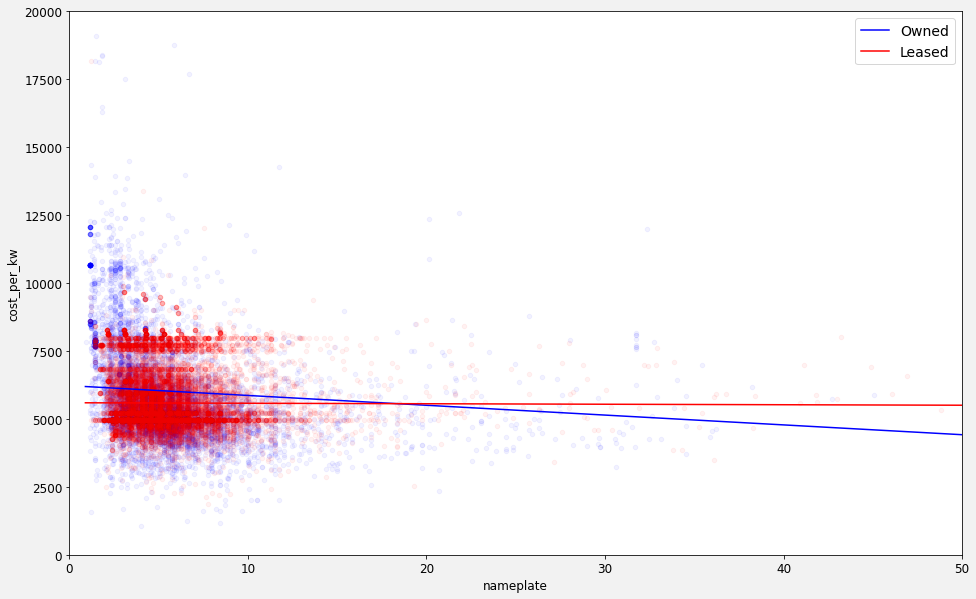

In [22]:
fig, ax = plt.subplots()
pv2012.loc[pv.lease==0].plot.scatter("nameplate", "cost_per_kw", alpha=.05, color="blue", ax=ax)
pv2012.loc[pv.lease==1].plot.scatter("nameplate", "cost_per_kw", alpha=.05, color="red", ax=ax)
ax.set_ylim(0,20000)
ax.set_xlim(0, 50)

ax.plot(x_line2, y_line2, color="blue", label="Owned")
ax.plot(x_line2, y_line_lease2, color="red", label="Leased")
ax.legend()

The model seems most reasonable when nameplate is relatively small - between 0 and 50 kw, which is the largest number of observations. This indicates that the host owned panels tend to be more expensive at the smallest nameplate, but this cost-advantage seems to disapear at higher nameplates. 

### C contractor year totals

The idea here is that a contractor with some scale may be able to have lower costs. We can see

In [23]:
mod_as3 = smf.ols("cost_per_kw~lease*nameplate + contractor_year_total", data=pv2012).fit()
mod_as3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            cost_per_kw   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     171.2
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          1.41e-144
Time:                        10:23:15   Log-Likelihood:            -1.8789e+05
No. Observations:               21622   AIC:                         3.758e+05
Df Residuals:                   21617   BIC:                         3.758e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              6250.4715     21.685    288.242      0.000    6207.968    6292.975
lease                  -245.7530     28.338     -8.672      0.000    -301.297    -190.209
nameplate               -36.1401      2.071    -17.450      0.000     -40.200     -32.081
lease:nameplate          33.9030      2.209     15.345      0.000      29.572      38.233
contractor_year_total    -0.0185      0.001    -15.445      0.000      -0.021      -0.016
==============================================================================
Omnibus:                     6772.423   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38418.831
Skew:                           1.392   Prob(JB):                         0.00
Kurtosis:                       8.907   Cond. No.                     4.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
pv2012.contractor_year_total.describe()

count    21622.00000
mean      9114.57400
std       9591.78654
min          1.29000
25%        434.59500
50%       4893.73500
75%      17093.86500
max      24951.35000
Name: contractor_year_total, dtype: float64

In [25]:
mean_nameplate = pv2012.nameplate.mean()
mean_interaction = np.mean(pv2012.nameplate*pv2012.lease)

In [26]:
N
x_line3 = np.linspace(1,25000, N)
y_line3 = mod_as3.params[0] + mod_as3.params[2]*mean_nameplate + mod_as3.params[3]*mean_interaction + mod_as3.params[4]*x_line

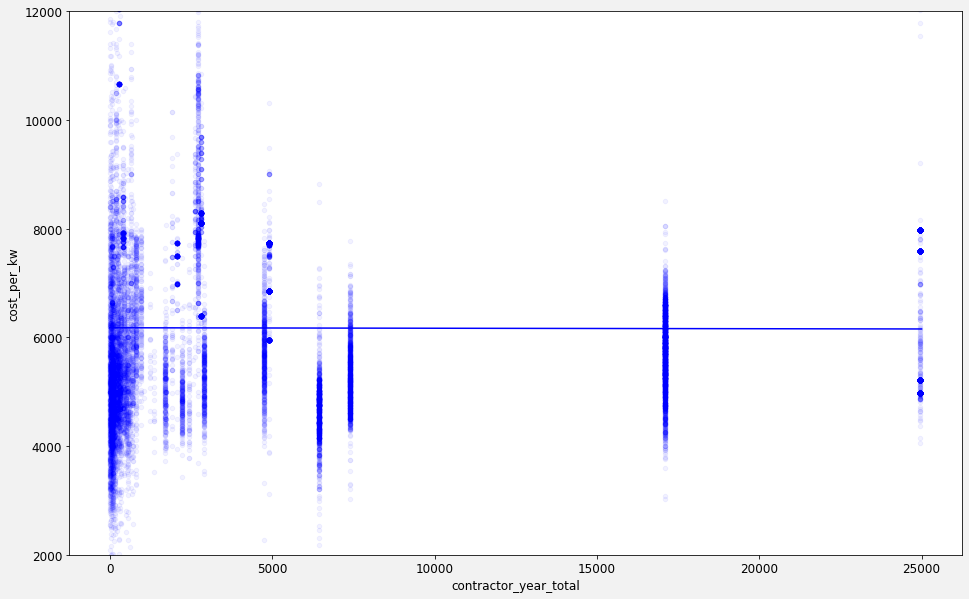

In [27]:
fig, ax = plt.subplots()
pv2012.plot.scatter("contractor_year_total", "cost_per_kw", alpha=.05, color="blue", ax=ax)
ax.set_ylim(2000,12000)
#ax.set_xlim(0, 50)


ax.plot(x_line3, y_line3, color="blue")


In our estimation we obtained a statistically significant result for this variable. This is in large part because we have many data points. But plotting results emphasises that the actual effect size is very modest.